In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
!ls /content/drive/MyDrive/


 123							   IMG_0480~2.jpg
 9506ADDB-F314-415B-AB6D-CE4C08DC4851.pdf		   null.pdf
'Colab Notebooks'					   pass_pic.jpeg
 Datasets						   resume
'Document from ★'					   resume.pdf
'Document from ★.pdf'					   RPA_SENT.pptx
 EAadhaar_2081111870679820201017190902_3005202392316.pdf  'Screenshot (90).png'
 fear_greed_index.csv					  'slomo(1).mp4'
 historical_data.csv


In [58]:
import pandas as pd

trader_df = pd.read_csv('/content/drive/MyDrive/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')

print(trader_df.head())
print(sentiment_df.head())



                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09451986a1874e3a9

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# Load trader data
trader_df = pd.read_csv('/content/drive/MyDrive/historical_data.csv')

# Load fear-greed index
sentiment_df = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')


In [61]:
print(trader_df.head())
print(sentiment_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09451986a1874e3a9

In [62]:
trader_df.info()
trader_df.describe()
trader_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32550 entries, 0 to 32549
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           32550 non-null  object 
 1   Coin              32550 non-null  object 
 2   Execution Price   32550 non-null  float64
 3   Size Tokens       32550 non-null  float64
 4   Size USD          32550 non-null  float64
 5   Side              32550 non-null  object 
 6   Timestamp IST     32550 non-null  object 
 7   Start Position    32550 non-null  float64
 8   Direction         32549 non-null  object 
 9   Closed PnL        32549 non-null  float64
 10  Transaction Hash  32549 non-null  object 
 11  Order ID          32549 non-null  float64
 12  Crossed           32549 non-null  object 
 13  Fee               32549 non-null  float64
 14  Trade ID          32549 non-null  float64
 15  Timestamp         32549 non-null  float64
dtypes: float64(9), object(7)
memory usage: 4

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,1
Closed PnL,1


In [63]:
sentiment_df.info()
sentiment_df['classification'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [64]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])



In [65]:
trader_df.columns = trader_df.columns.str.lower()
sentiment_df.columns = sentiment_df.columns.str.lower()

trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

trader_df['date'] = trader_df['timestamp'].dt.date


In [66]:
print(trader_df[['timestamp', 'date']].head())
print(sentiment_df[['date', 'classification']].head())


            timestamp        date
0 1970-01-01 00:28:50  1970-01-01
1 1970-01-01 00:28:50  1970-01-01
2 1970-01-01 00:28:50  1970-01-01
3 1970-01-01 00:28:50  1970-01-01
4 1970-01-01 00:28:50  1970-01-01
        date classification
0 2018-02-01           Fear
1 2018-02-02   Extreme Fear
2 2018-02-03           Fear
3 2018-02-04   Extreme Fear
4 2018-02-05   Extreme Fear


In [67]:
trader_df.columns = trader_df.columns.str.lower()
sentiment_df.columns = sentiment_df.columns.str.lower()



In [68]:
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp ist'], format="%d-%m-%Y %H:%M")

trader_df['date'] = trader_df['timestamp_ist'].dt.date


In [69]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [70]:
df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

df.head()


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date,timestamp_ist,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed


In [71]:
import pandas as pd

# 1. Load datasets
trader_df = pd.read_csv("/content/drive/MyDrive/historical_data.csv")
sentiment_df = pd.read_csv("/content/drive/MyDrive/fear_greed_index.csv")

# 2. Standardize column names to lowercase
trader_df.columns = trader_df.columns.str.lower()
sentiment_df.columns = sentiment_df.columns.str.lower()

# 3. Convert trader_df['timestamp ist'] to datetime
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp ist'], format="%d-%m-%Y %H:%M")

# 4. Extract date from trader_df timestamp
trader_df['date'] = trader_df['timestamp_ist'].dt.date

# 5. Convert sentiment_df['date'] into datetime and extract date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# 6. Merge trader data with sentiment data
df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

# 7. Verify merged data
print(df[['timestamp_ist', 'date', 'classification']].head())
print("\nSentiment distribution:")
print(df['classification'].value_counts())


        timestamp_ist        date classification
0 2024-12-02 22:50:00  2024-12-02  Extreme Greed
1 2024-12-02 22:50:00  2024-12-02  Extreme Greed
2 2024-12-02 22:50:00  2024-12-02  Extreme Greed
3 2024-12-02 22:50:00  2024-12-02  Extreme Greed
4 2024-12-02 22:50:00  2024-12-02  Extreme Greed

Sentiment distribution:
classification
Fear             9761
Greed            8758
Extreme Greed    6925
Neutral          5854
Extreme Fear     1246
Name: count, dtype: int64


In [72]:
print(df.info())
print(df.describe())

print(df.columns)
print(df.head())

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32550 entries, 0 to 32549
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account           32550 non-null  object        
 1   coin              32550 non-null  object        
 2   execution price   32550 non-null  float64       
 3   size tokens       32550 non-null  float64       
 4   size usd          32550 non-null  float64       
 5   side              32550 non-null  object        
 6   timestamp ist     32550 non-null  object        
 7   start position    32550 non-null  float64       
 8   direction         32549 non-null  object        
 9   closed pnl        32549 non-null  float64       
 10  transaction hash  32549 non-null  object        
 11  order id          32549 non-null  float64       
 12  crossed           32549 non-null  object        
 13  fee               32549 non-null  float64       
 14  trade id          3254

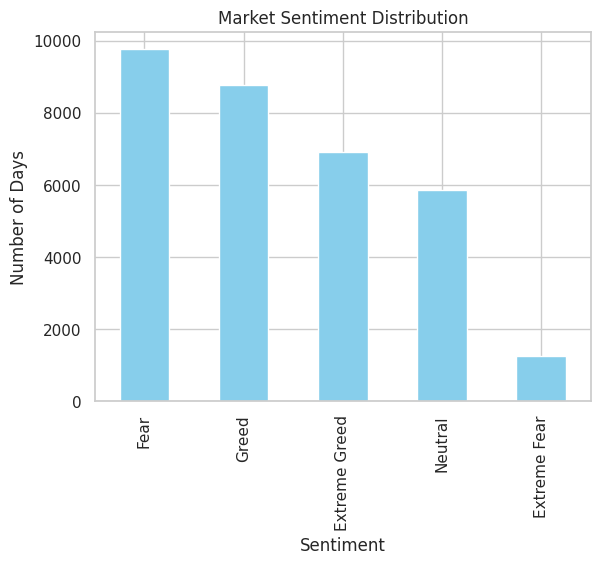

In [73]:
import matplotlib.pyplot as plt

df['classification'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Market Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Days")
plt.show()


In [74]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.columns)



Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'timestamp_ist', 'date', 'classification'],
      dtype='object')


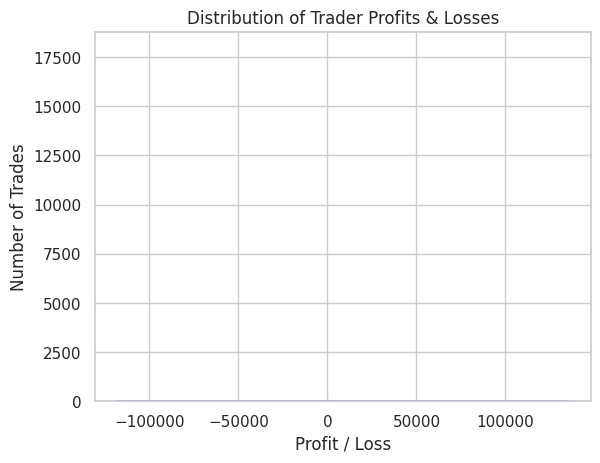

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['closed_pnl'], kde=True, color='blue')
plt.title("Distribution of Trader Profits & Losses")
plt.xlabel("Profit / Loss")
plt.ylabel("Number of Trades")
plt.show()


In [76]:
print(df[['closed_pnl', 'classification']].head())


   closed_pnl classification
0         0.0  Extreme Greed
1         0.0  Extreme Greed
2         0.0  Extreme Greed
3         0.0  Extreme Greed
4         0.0  Extreme Greed


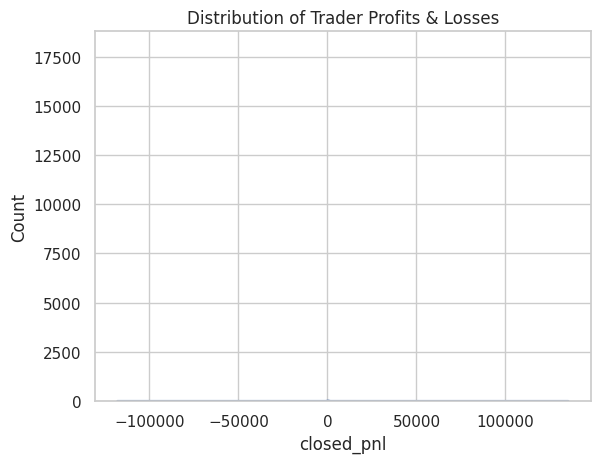

In [78]:
import seaborn as sns

sns.histplot(df['closed_pnl'], kde=True)
plt.title("Distribution of Trader Profits & Losses")
plt.show()


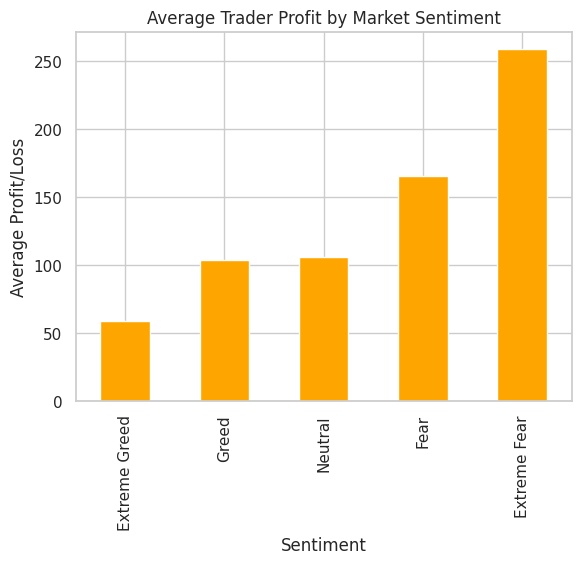

In [79]:
df.groupby('classification')['closed_pnl'].mean().sort_values().plot(kind='bar', color='orange')
plt.title("Average Trader Profit by Market Sentiment")
plt.ylabel("Average Profit/Loss")
plt.xlabel("Sentiment")
plt.show()


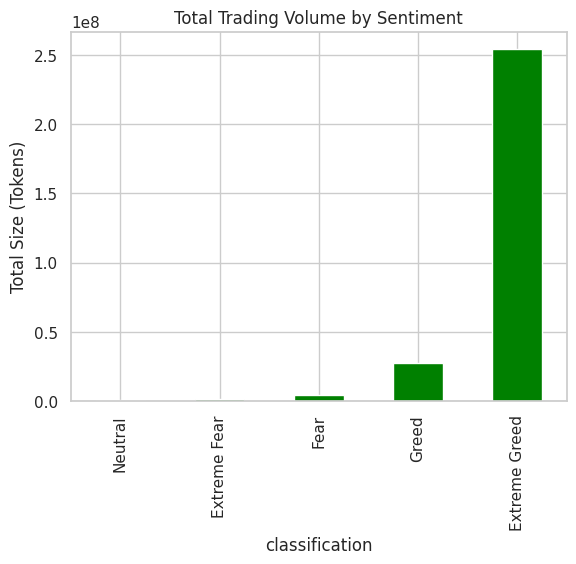

In [80]:
df.groupby('classification')['size_tokens'].sum().sort_values().plot(kind='bar', color='green')
plt.title("Total Trading Volume by Sentiment")
plt.ylabel("Total Size (Tokens)")
plt.show()


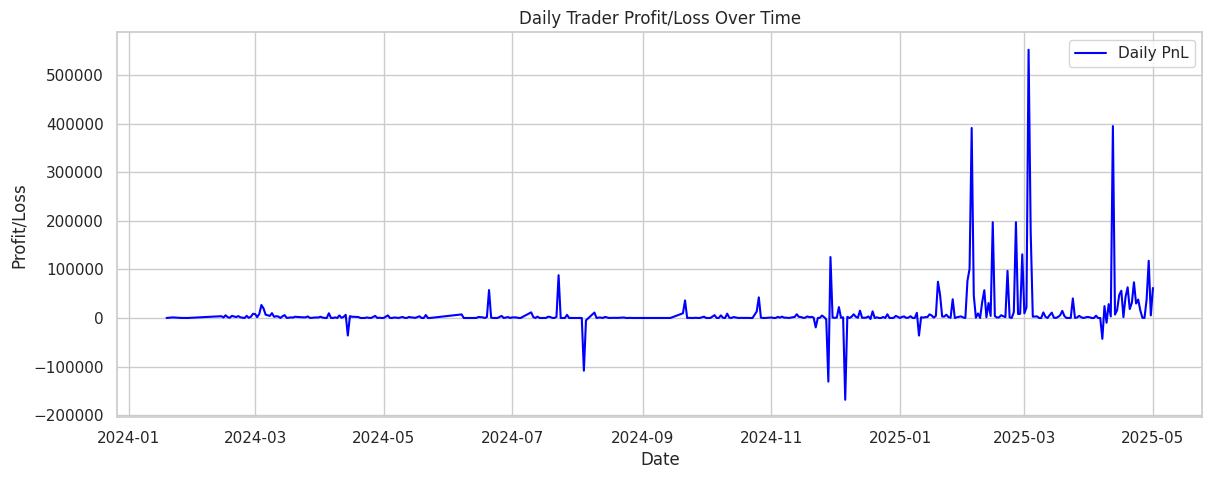

In [81]:
daily_pnl = df.groupby('date')['closed_pnl'].sum()
daily_sentiment = df.groupby('date')['classification'].first()

plt.figure(figsize=(14,5))
daily_pnl.plot(label="Daily PnL", color="blue")
plt.title("Daily Trader Profit/Loss Over Time")
plt.xlabel("Date")
plt.ylabel("Profit/Loss")
plt.legend()
plt.show()


In [82]:
print("Trader data shape:", trader_df.shape)
print("Trader data columns:", trader_df.columns.tolist())

print("\nSentiment data shape:", sentiment_df.shape)
print("Sentiment data columns:", sentiment_df.columns.tolist())



Trader data shape: (32550, 18)
Trader data columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'timestamp_ist', 'date']

Sentiment data shape: (2644, 4)
Sentiment data columns: ['timestamp', 'value', 'classification', 'date']


In [83]:
import pandas as pd

# Convert trader timestamp to datetime
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp_ist'], errors='coerce')
trader_df['date'] = trader_df['timestamp_ist'].dt.date

# Convert sentiment date to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date


In [84]:
# Replace spaces in column names with underscores for easier access
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check renamed columns
print("Trader columns:", trader_df.columns.tolist())
print("Sentiment columns:", sentiment_df.columns.tolist())



Trader columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'timestamp_ist', 'date']
Sentiment columns: ['timestamp', 'value', 'classification', 'date']


In [85]:
merged = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

print("Merged dataframe shape:", merged.shape)
print("Merged columns:", merged.columns.tolist())
print(merged[['date', 'closed_pnl', 'classification']].head())


Merged dataframe shape: (32550, 19)
Merged columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'timestamp_ist', 'date', 'classification']
         date  closed_pnl classification
0  2024-12-02         0.0  Extreme Greed
1  2024-12-02         0.0  Extreme Greed
2  2024-12-02         0.0  Extreme Greed
3  2024-12-02         0.0  Extreme Greed
4  2024-12-02         0.0  Extreme Greed


In [86]:
print("Closed PnL summary:\n", merged['closed_pnl'].describe())
print("Unique sentiment labels:", merged['classification'].unique())


Closed PnL summary:
 count     32549.000000
mean        120.520009
std        1755.403698
min     -117990.104100
25%           0.000000
50%           0.000000
75%          18.692775
max      135329.090100
Name: closed_pnl, dtype: float64
Unique sentiment labels: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' nan]


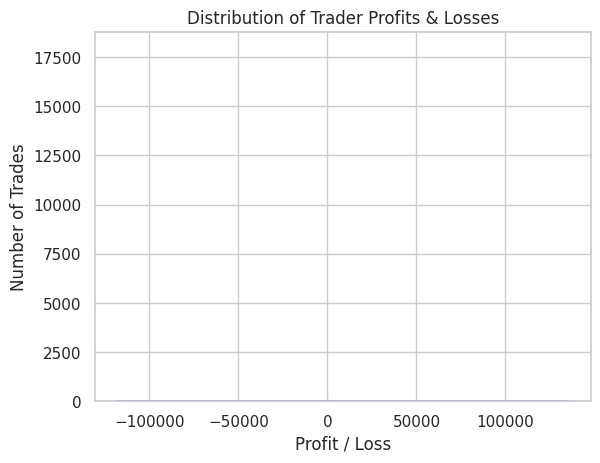

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged['closed_pnl'], kde=True, color='blue')
plt.title("Distribution of Trader Profits & Losses")
plt.xlabel("Profit / Loss")
plt.ylabel("Number of Trades")
plt.show()


In [88]:
# make sure merged dataframe exists
print("Merged dataframe exists?", 'merged' in globals())
print("Merged shape (rows, cols):", merged.shape)
print("Columns:", merged.columns.tolist())

# ensure closed_pnl and classification exist
print("closed_pnl dtype:", merged['closed_pnl'].dtype)
print("classification sample:", merged['classification'].unique()[:10])


Merged dataframe exists? True
Merged shape (rows, cols): (32550, 19)
Columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'timestamp_ist', 'date', 'classification']
closed_pnl dtype: float64
classification sample: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' nan]


In [89]:
# Summary by sentiment: count, total, avg, median, win rate
summary = merged.groupby('classification').agg(
    trades=('closed_pnl','count'),
    total_pnl=('closed_pnl','sum'),
    avg_pnl=('closed_pnl','mean'),
    median_pnl=('closed_pnl','median'),
    win_rate=('closed_pnl', lambda x: (x>0).mean())
).reset_index().sort_values('trades', ascending=False)

display(summary)


,classification,trades,total_pnl,avg_pnl,median_pnl,win_rate
2,Fear,9761,1.619931e+06,165.959508,0.0,0.402315
3,Greed,8758,9.076732e+05,103.639323,0.0,0.408427
1,Extreme Greed,6924,4.100725e+05,59.224804,0.0,0.484477
4,Neutral,5854,6.199659e+05,105.904659,0.0,0.463444
0,Extreme Fear,1246,3.226914e+05,258.981881,0.0,0.329053


In [90]:
# Use 'size' column (tokens or USD) — we try to detect a size column automatically
size_cols = [c for c in merged.columns if 'size' in c]
print("Detected size columns:", size_cols)

# Use the merged['size'] if available; otherwise you may need to replace with 'size_tokens' or 'size_usd'
if 'size' in merged.columns:
    vol_by_sent = merged.groupby('classification').agg(
        total_size=('size','sum'),
        avg_size=('size','mean'),
        trades=('size','count')
    ).reset_index().sort_values('total_size', ascending=False)
else:
    # try size_tokens or size_usd
    col = size_cols[0] if size_cols else None
    if col:
        vol_by_sent = merged.groupby('classification').agg(
            total_size=(col,'sum'),
            avg_size=(col,'mean'),
            trades=(col,'count')
        ).reset_index().sort_values('total_size', ascending=False)
    else:
        raise KeyError("No size column found. Rename size_tokens/size_usd to 'size' or edit the code.")

display(vol_by_sent)


Detected size columns: ['size_tokens', 'size_usd']


,classification,total_size,avg_size,trades
1,Extreme Greed,2.540357e+08,36683.861281,6925
3,Greed,2.784547e+07,3179.432206,8758
2,Fear,4.351982e+06,445.854066,9761
0,Extreme Fear,1.673435e+06,1343.045978,1246
4,Neutral,8.878491e+05,151.665382,5854


In [91]:
neg = merged[merged['closed_pnl'] < 0].copy()
neg_stats = neg.groupby('classification').agg(
    neg_trades=('closed_pnl','count'),
    avg_loss=('closed_pnl','mean'),
    median_loss=('closed_pnl','median'),
    max_loss=('closed_pnl','min')  # most negative value
).reset_index().sort_values('avg_loss')  # most negative first

display(neg_stats)


,classification,neg_trades,avg_loss,median_loss,max_loss
3,Greed,268,-898.594968,-11.936684,-117990.10410
0,Extreme Fear,161,-690.939984,-88.438400,-29370.11980
4,Neutral,148,-620.412878,-2.703939,-18993.46842
2,Fear,568,-467.990895,-40.262834,-19841.24014
1,Extreme Greed,374,-445.817507,-21.046464,-10259.46800


In [92]:
# combine ranks of avg_pnl (higher better) and win_rate (higher better)
score_df = summary.copy()
score_df['rank_avg_pnl'] = score_df['avg_pnl'].rank(ascending=False)
score_df['rank_win_rate'] = score_df['win_rate'].rank(ascending=False)
score_df['combined_score'] = score_df['rank_avg_pnl'] + score_df['rank_win_rate']
score_df = score_df.sort_values('combined_score')
display(score_df)
print("\nBest sentiment according to combined_score:", score_df.iloc[0]['classification'])


,classification,trades,total_pnl,avg_pnl,median_pnl,win_rate,rank_avg_pnl,rank_win_rate,combined_score
4,Neutral,5854,6.199659e+05,105.904659,0.0,0.463444,3.0,2.0,5.0
2,Fear,9761,1.619931e+06,165.959508,0.0,0.402315,2.0,4.0,6.0
1,Extreme Greed,6924,4.100725e+05,59.224804,0.0,0.484477,5.0,1.0,6.0
0,Extreme Fear,1246,3.226914e+05,258.981881,0.0,0.329053,1.0,5.0,6.0
3,Greed,8758,9.076732e+05,103.639323,0.0,0.408427,4.0,3.0,7.0



Best sentiment according to combined_score: Neutral


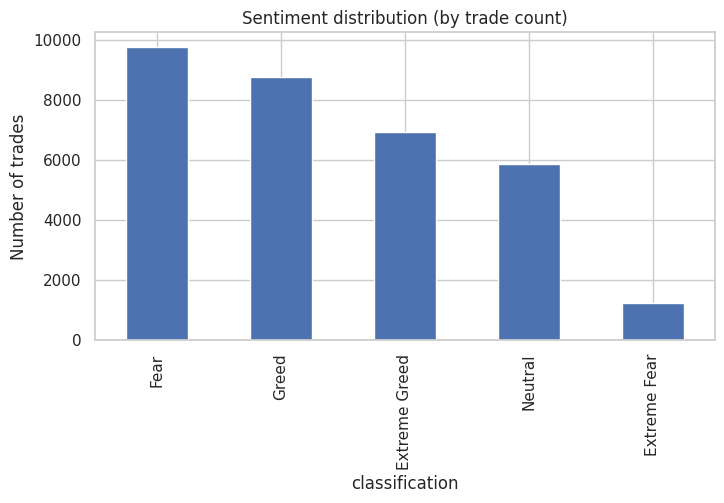

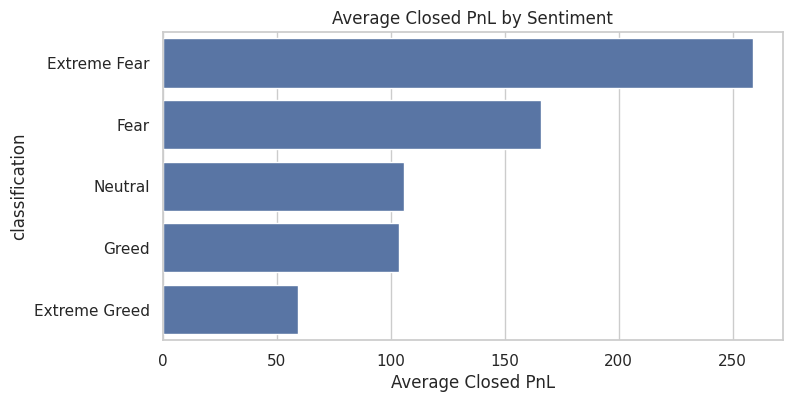

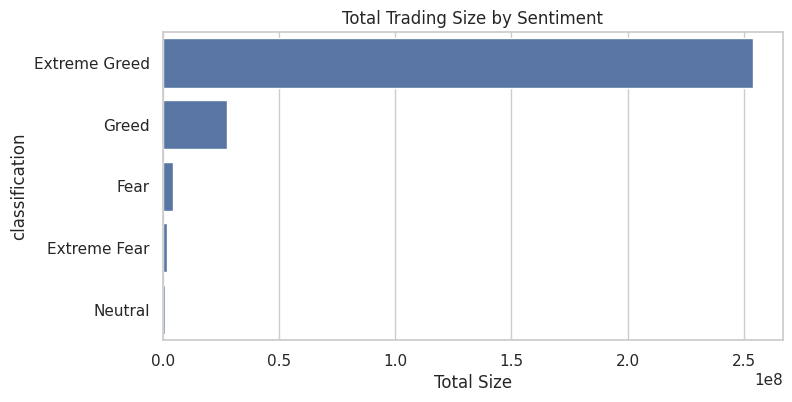

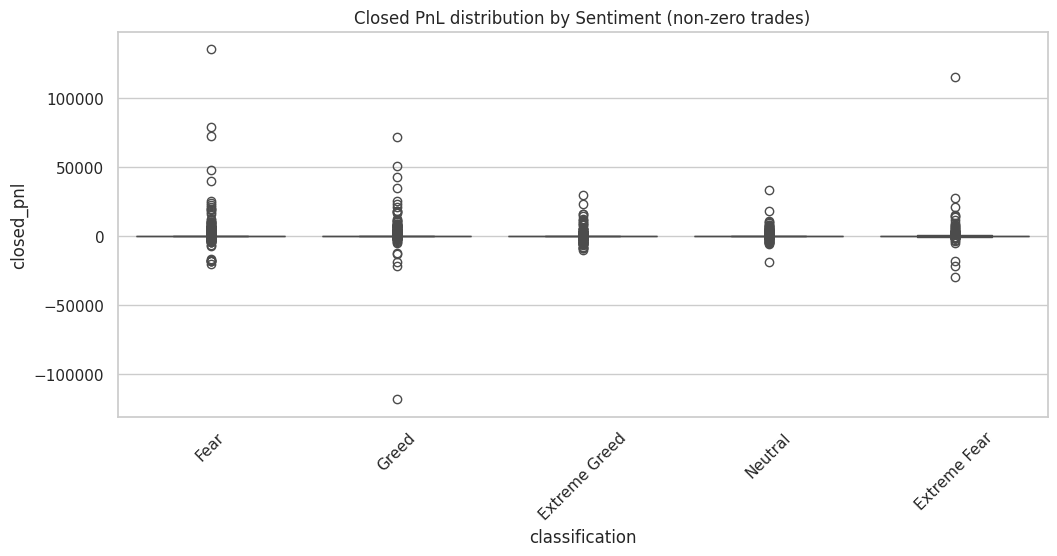

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 6.1: Sentiment distribution (trades)
plt.figure(figsize=(8,4))
merged['classification'].value_counts().plot(kind='bar')
plt.title('Sentiment distribution (by trade count)')
plt.ylabel('Number of trades')
plt.show()

# 6.2: Avg PnL by sentiment (bar)
plt.figure(figsize=(8,4))
summary_plot = summary.sort_values('avg_pnl', ascending=False)
sns.barplot(data=summary_plot, x='avg_pnl', y='classification')
plt.title('Average Closed PnL by Sentiment')
plt.xlabel('Average Closed PnL')
plt.show()

# 6.3: Volume by sentiment (if size exists)
plt.figure(figsize=(8,4))
sns.barplot(data=vol_by_sent.sort_values('total_size', ascending=False), x='total_size', y='classification')
plt.title('Total Trading Size by Sentiment')
plt.xlabel('Total Size')
plt.show()

# 6.4: Boxplot of non-zero PnL by sentiment (visualize distribution)
non_zero = merged[merged['closed_pnl'].abs() > 0]
plt.figure(figsize=(12,5))
order = merged['classification'].value_counts().index
sns.boxplot(x='classification', y='closed_pnl', data=non_zero, order=order)
plt.xticks(rotation=45)
plt.title('Closed PnL distribution by Sentiment (non-zero trades)')
plt.show()
